<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Read-in-the-5-km-nearir-and-ir-water-vapor-images" data-toc-modified-id="Read-in-the-5-km-nearir-and-ir-water-vapor-images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read in the 5 km nearir and ir water vapor images</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Here-is-wv_ir" data-toc-modified-id="Here-is-wv_ir-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Here is wv_ir</a></span></li><li><span><a href="#Here-is-wv_nearir_ir-mapped-to-the-low-resolution-area_def" data-toc-modified-id="Here-is-wv_nearir_ir-mapped-to-the-low-resolution-area_def-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Here is wv_nearir_ir mapped to the low resolution area_def</a></span></li></ul></li></ul></li><li><span><a href="#Questions" data-toc-modified-id="Questions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Questions</a></span><ul class="toc-item"><li><span><a href="#Question-9.1" data-toc-modified-id="Question-9.1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Question 9.1</a></span></li><li><span><a href="#Question-9.2" data-toc-modified-id="Question-9.2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Question 9.2</a></span><ul class="toc-item"><li><span><a href="#Here-is-the-test-that-autograder-will-run" data-toc-modified-id="Here-is-the-test-that-autograder-will-run-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Here is the test that autograder will run</a></span></li></ul></li></ul></li></ul></div>

# Introduction

This assignment uses the functions and files defined in level2_cartopy_plot to look
at the difference between wv_ir and wv_nearir mapped onto the low resolution
grid.

# Setup

1. Understand  and run level2_cartopy_plot

1. Setup should be the same, rerun test to check

```
      python -m a301.install_tests.assign8_test
```


In [12]:
from matplotlib import cm

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from IPython.display import Image,display
from pyresample import geometry
import pdb

#Image('figures/MYBRGB.A2016224.2100.006.2016237025650.jpg',width=600)

In [13]:
%matplotlib inline
from matplotlib import cm
from a301.scripts.modismeta_read import parseMeta
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from IPython.display import Image,display
import a301
from pathlib import Path
from pyhdf.SD import SD, SDC
import pprint
import json
from a301.geometry import area_def_from_dict, get_image, plot_image

# Read in the 5 km nearir and ir water vapor images


use get_image and plot_image from the library

### Here is wv_ir

In [14]:
foldername=a301.map_dir / Path('wv_maps')
print(foldername)
image_wv_ir, area_def_lr = get_image(foldername, 'wv_ir')

C:\Users\Pearl\Desktop\ATSC 301\a301_code\map_data\wv_maps


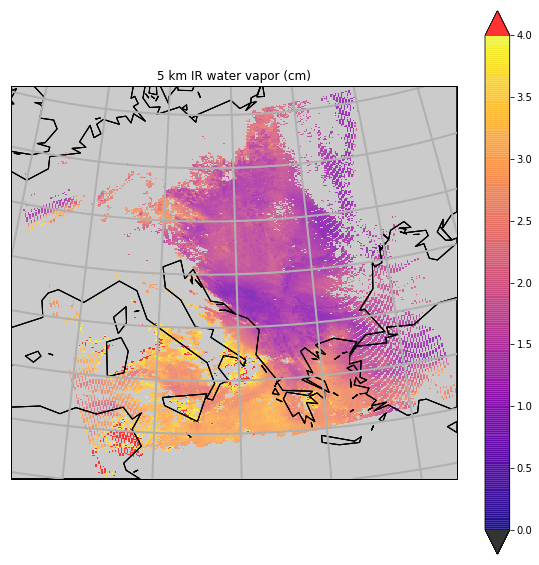

In [15]:
fig,ax=plot_image(image_wv_ir, area_def_lr)
ax.set_title('5 km IR water vapor (cm)');

### Here is wv_nearir_ir mapped to the low resolution area_def

(446, 297)


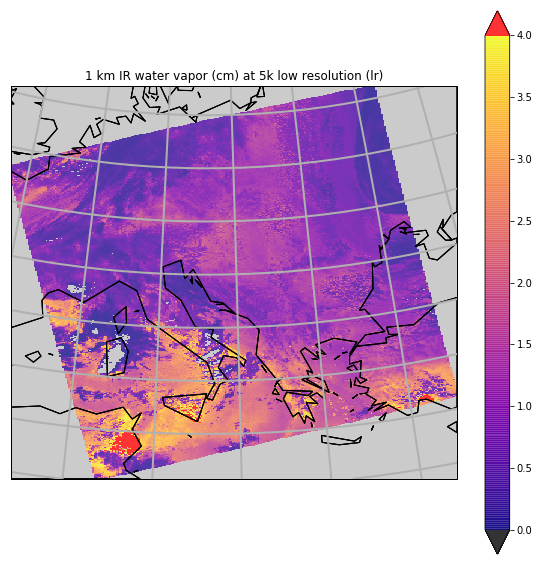

In [16]:
image_wv_nearir_lr, area_def_hr = get_image(foldername, 'wv_nearir_lr')
fig,ax=plot_image(image_wv_nearir_lr, area_def_hr)
ax.set_title('1 km IR water vapor (cm) at 5k low resolution (lr)');
print(image_wv_nearir_lr.shape)

# Questions

## Question 9.1

in the cell below calculate the difference between the nearir_ir and wv_ir
images as a new variable called wv_difference and plot
it using plot_image

Use a diverging palette like RdYlBu (see [matplotlib palettes](https://matplotlib.org/tutorials/colors/colormaps.html))
to highlight the areas where the difference is zero and show postiive and negative departures.
Set your vmin, vmax to -1, 1  cm.

Area ID: modis_ir_wv
Description: modis_ir_wv
Projection ID: ir wv retrieval modis 5 km resolution (lr=low resolution)
Projection: {'datum': 'WGS84', 'ellps': 'WGS84', 'lat_0': '43.914741864615095', 'lon_0': '15.725500991809131', 'proj': 'laea', 'x_0': '0.0', 'y_0': '0.0'}
Number of columns: 297
Number of rows: 446
Area extent: (-1235627.6034191493, -1159213.7452908722, 1562530.62456215, 1302111.8845846583)


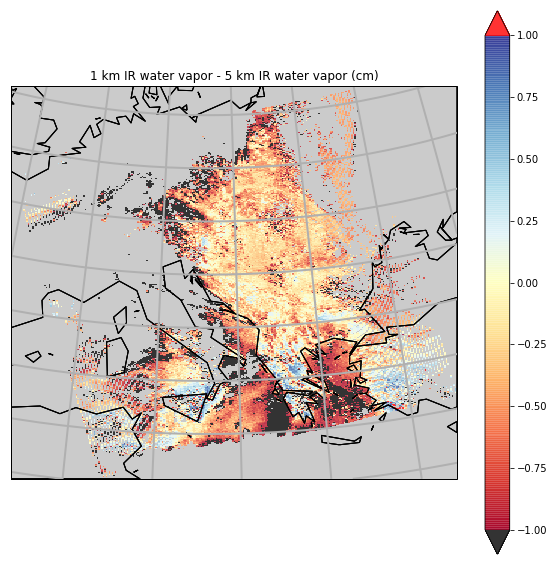

In [17]:
wv_difference = (image_wv_nearir_lr - image_wv_ir)
fig,ax=plot_image(wv_difference, area_def_hr,-1,1,'RdYlBu')
ax.set_title('1 km IR water vapor - 5 km IR water vapor (cm)');
print(area_def_hr)

## Question 9.2

Write out your wv_difference image and using dump_image

In [18]:
from a301.geometry import dump_image, area_def_to_dict
m5_file = a301.data_dir / Path('myd05_l2_10_7.hdf')

image_name='wv_difference'
metadata_dict=dict(modismeta = parseMeta(m5_file))
metadata_dict['area_def']=area_def_to_dict(area_def_lr)
metadata_dict['image_name']=image_name
metadata_dict['description']='modis near ir water vapor (cm) sampled at 1 km resolution minus the modis near ir water vapor (cm) sampled at 5 km resolution'
metadata_dict['history']='wv_assign8-PA.ipynb'
map_dir = a301.data_dir.parent / Path('map_data/wv_maps')
map_dir.mkdir(parents=True, exist_ok=True)
dump_image(wv_difference,metadata_dict,map_dir,image_name)

image_name='wv_nearir_lr'
metadata_dict=dict(modismeta = parseMeta(m5_file))
metadata_dict['area_def']=area_def_to_dict(area_def_lr)
metadata_dict['image_name']=image_name
metadata_dict['description']='modis near ir water vapor (cm) sampled at 5 km resolution'
metadata_dict['history']='wv_assign8-PA.ipynb'
map_dir = a301.data_dir.parent / Path('map_data/wv_maps')
map_dir.mkdir(parents=True, exist_ok=True)
dump_image(image_wv_nearir_lr,metadata_dict,map_dir,image_name)

image_name='wv_ir'
metadata_dict=dict(modismeta = parseMeta(m5_file))
metadata_dict['area_def']=area_def_to_dict(area_def_lr)
metadata_dict['image_name']=image_name
metadata_dict['description']='modis ir water vapor (cm) sampled at 5 km resolution'
metadata_dict['history']='wv_assign8-PA.ipynb'
dump_image(image_wv_ir,metadata_dict,map_dir,image_name)


dumping C:\Users\Pearl\Desktop\ATSC 301\a301_code\map_data\wv_maps\wv_difference
 and C:\Users\Pearl\Desktop\ATSC 301\a301_code\map_data\wv_maps\wv_difference.json


dumping C:\Users\Pearl\Desktop\ATSC 301\a301_code\map_data\wv_maps\wv_nearir_lr
 and C:\Users\Pearl\Desktop\ATSC 301\a301_code\map_data\wv_maps\wv_nearir_lr.json


dumping C:\Users\Pearl\Desktop\ATSC 301\a301_code\map_data\wv_maps\wv_ir
 and C:\Users\Pearl\Desktop\ATSC 301\a301_code\map_data\wv_maps\wv_ir.json



### Here is the test that autograder will run

Copy this code in a new cell and make sure it passes the test (i.e. doesn't complain)
This is what autograder will run automatically

In [19]:
from a301.geometry import get_image
#
# read back the image and the area_def
#
foldername= a301.map_dir / Path('wv_maps')
image_array_name='wv_difference'
image_array,area_def=get_image(foldername,image_array_name)
#
# make sure the area_def and image sizes agree
#
area_def_size=(area_def.y_size,area_def.x_size)
image_size=image_array.shape
assert(area_def_size == image_size)